In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


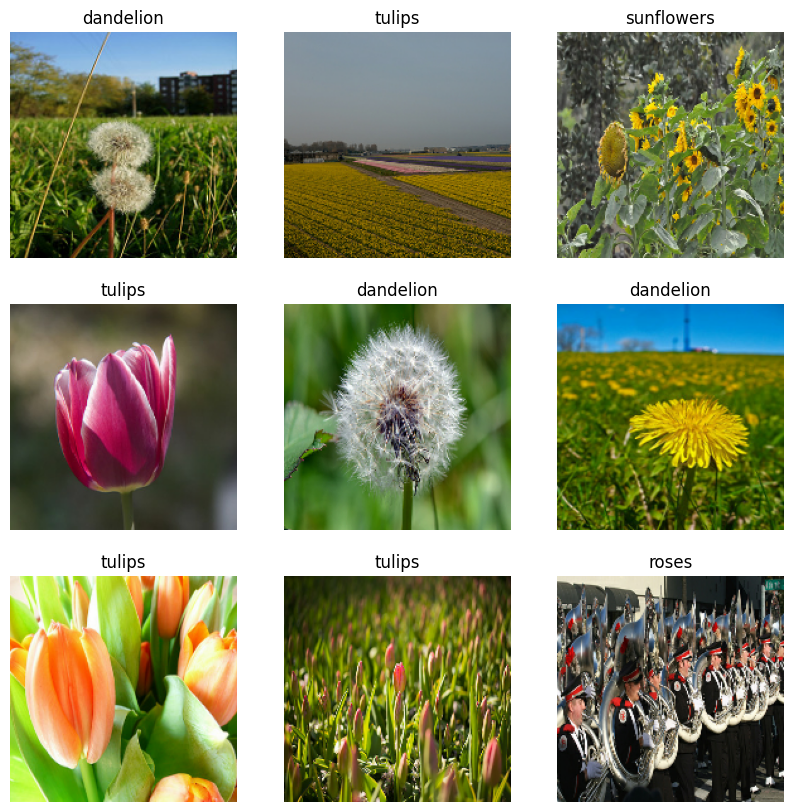

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [28]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [32]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10


92/92 [==============================] - 12s 127ms/step - loss: 1.3469 - accuracy: 0.4520 - val_loss: 1.0599 - val_accuracy: 0.5545
Epoch 2/10
92/92 [==============================] - 10s 113ms/step - loss: 0.9813 - accuracy: 0.6114 - val_loss: 0.9353 - val_accuracy: 0.6226
Epoch 3/10
92/92 [==============================] - 10s 112ms/step - loss: 0.8166 - accuracy: 0.6788 - val_loss: 0.9202 - val_accuracy: 0.6199
Epoch 4/10
92/92 [==============================] - 10s 113ms/step - loss: 0.6334 - accuracy: 0.7657 - val_loss: 1.0756 - val_accuracy: 0.5967
Epoch 5/10
92/92 [==============================] - 10s 113ms/step - loss: 0.4013 - accuracy: 0.8617 - val_loss: 1.1568 - val_accuracy: 0.6144
Epoch 6/10
92/92 [==============================] - 10s 113ms/step - loss: 0.2465 - accuracy: 0.9206 - val_loss: 1.2173 - val_accuracy: 0.6390
Epoch 7/10
92/92 [==============================] - 11s 114ms/step - loss: 0.1362 - accuracy: 0.9591 - val_loss: 1.4199 - val_accuracy: 0.64

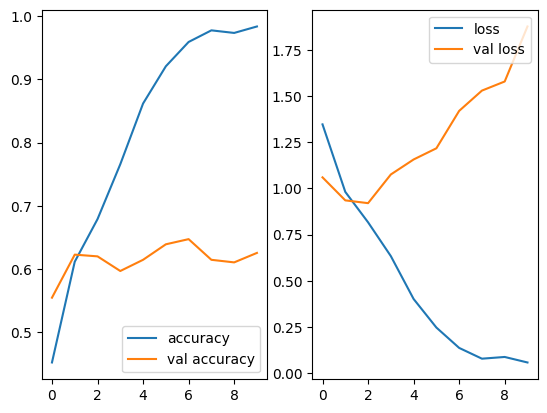

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.legend(loc='upper right')
plt.show()

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [40]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names), name="outputs")
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 13s 133ms/step - loss: 1.3988 - accuracy: 0.4043 - val_loss: 1.1970 - val_accuracy: 0.5095
Epoch 2/15
92/92 [==============================] - 12s 131ms/step - loss: 1.0959 - accuracy: 0.5616 - val_loss: 1.0591 - val_accuracy: 0.5777
Epoch 3/15
92/92 [==============================] - 12s 131ms/step - loss: 0.9766 - accuracy: 0.6114 - val_loss: 0.9875 - val_accuracy: 0.6144
Epoch 4/15
92/92 [==============================] - 12s 131ms/step - loss: 0.9021 - accuracy: 0.6495 - val_loss: 0.9177 - val_accuracy: 0.6390
Epoch 5/15
92/92 [==============================] - 12s 132ms/step - loss: 0.8612 - accuracy: 0.6642 - val_loss: 0.9439 - val_accuracy: 0.6567
Epoch 6/15
92/92 [==============================] - 12s 134ms/step - loss: 0.7885 - accuracy: 0.6972 - val_loss: 0.8578 - val_accuracy: 0.6730
Epoch 7/15
92/92 [==============================] - 12s 135ms/step - loss: 0.7691 - accuracy: 0.6975 - val_loss: 0.8467 - val_accuracy: 0.6730

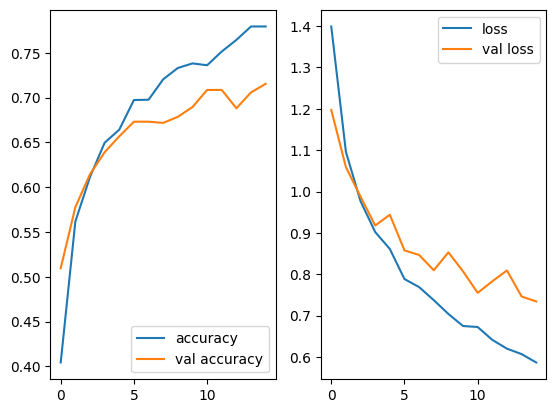

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.legend(loc='upper right')
plt.show()

In [46]:
# convert model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save model
with open('model.tflite', 'wb') as fp:
    fp.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Stefan\AppData\Local\Temp\tmpaltv6e7l\assets


INFO:tensorflow:Assets written to: C:\Users\Stefan\AppData\Local\Temp\tmpaltv6e7l\assets
